#**Desafío 5**

Francisca Pinto González

17 de agosto de 2021

##**Parte I**

1. Para empezar importamos las librerías, y posteriormente el dataframe.
2. Se genera columna como index
3. Para conocer las características de las variables del dataframe, se usa el método info (total de filas, cantidad de datos nulos por variable).

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random

df = pd.read_csv("/content/qog_std_cs_jan18.csv")
df = df.reset_index(drop = True)
df["index_col"] = df.index
df.info(verbose = True, null_counts = True)

Posteriormente se continúa con lo solicitado: crear un dataframe con parte de las variables.

In [ ]:
np.random.seed(5374)
type(list(df["index_col"]))
ind = np.array(random.sample(list(df["index_col"]), k = int(len(df)/2)))
ind = np.sort(ind)

df_sample = df.loc[ind, ["index_col", "cname", "undp_hdi", "ccodealp", "ht_region", "gle_cgdpc", "imf_pop", "wef_imort", "who_alc2000", "who_tobt", "wdi_exph"]].reset_index(drop = True)
df_sample["index_col"] = df_sample.index
df_sample["region_name"] = df_sample["ht_region"].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["East Europe", "LatAm", "NorthAfrica", "SubSaharian", "WesternDem", "EastAsia", "SouthEastAsia", "SouthAsia", "Pacific", "Caribbean"])
df_sample

#**Parte II**

Notas:
1. La función incorpora validación de pd.Serie y de datos de tipo float o integer.
2. Además, se dejó una tabla de frecuencias en caso de que se trate de variables discretas.

In [8]:
def descriptiva_frecuencia(col):
  df_col = df_sample[col]
  df_gp = prom = 0
  devest = 0
  if isinstance(df_col, pd.Series) is True:
    if df_col.dtype != "object":
      df_col_dropna = df_col.dropna()
      prom = round(df_col_dropna.mean(), 3)
      devest = round(np.sqrt(df_col_dropna.var()), 3)
    
    else:
      df_gp = df_sample.groupby(col)[col].count()
  else:
    raise ValueError("Los datos no son del tipo pd.Series, selecciona otros.")

  return prom, devest, df_gp

descriptiva_frecuencia("gle_cgdpc")

(12771.543, 13102.145, 0)

In [9]:
descriptiva_frecuencia("undp_hdi")

(0.705, 0.146, 0)

In [10]:
descriptiva_frecuencia("imf_pop")

(27.715, 45.839, 0)

#**Parte III**

Se parte con el método info para saber qué columnas podemos utilizar para el ejemplo de la función a crear.

In [ ]:
df_sample.info()
#La mayor cantidad de casos perdidos está en las columnas: who_tobt, imf_pop, wef_imort

In [12]:
def null_list (dataframe, var, print_list = False):

  if isinstance(dataframe[var], pd.Series) is True:
    nvalues_countries = dataframe.loc[dataframe[var].isnull()]["cname"].unique()
    nvalues_count = dataframe.loc[dataframe[var].isnull()]["cname"].count()
    print("La cantidad de países sin información es:", nvalues_count, "y representan un", round((nvalues_count/len(dataframe))*100, 2), "% del total de países de la muestra.\n")
    
    if print_list == True:
      print("Los países sin información en el caso de", var, "son:\n")
      print(nvalues_countries)
      
  else:
    raise ValueError("Los datos no son del tipo pd.Series, selecciona otros.")

null_list(df_sample, "who_tobt", True)

La cantidad de países sin información es: 33 y representan un 34.02 % del total de países de la muestra.

Los países sin información en el caso de who_tobt son:

['Afghanistan' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Austria' 'Bhutan'
 'Bolivia' 'Solomon Islands' 'Central African Republic' 'Taiwan'
 'Cyprus (1975-)' 'Dominica' 'Djibouti' 'Grenada' 'Guatemala' 'Guinea'
 'Guyana' 'Madagascar' 'Vanuatu' 'Marshall Islands' 'Peru' 'Guinea-Bissau'
 'Timor-Leste' 'Somalia' 'Zimbabwe' 'Sudan (2012-)' 'Syria' 'Tajikistan'
 'Trinidad and Tobago' 'United Arab Emirates' 'Tunisia' 'Tuvalu' 'Yemen']


In [13]:
null_list(df_sample, "imf_pop", True)

La cantidad de países sin información es: 22 y representan un 22.68 % del total de países de la muestra.

Los países sin información en el caso de imf_pop son:

['Antigua and Barbuda' 'Cameroon' 'Central African Republic' 'China'
 'Costa Rica' 'Cuba' 'Dominica' 'Djibouti' 'Grenada' 'Guatemala' 'India'
 'Madagascar' 'Namibia' 'Guinea-Bissau' 'Senegal' 'Somalia'
 'Sudan (2012-)' 'Syria' 'United Arab Emirates' 'Tunisia' 'Yemen' 'Zambia']


In [14]:
null_list(df_sample, "wef_imort", True)

La cantidad de países sin información es: 18 y representan un 18.56 % del total de países de la muestra.

Los países sin información en el caso de wef_imort son:

['Afghanistan' 'Antigua and Barbuda' 'Solomon Islands' 'Belarus'
 'Central African Republic' 'Cuba' 'Dominica' 'Djibouti' 'Grenada'
 'Vanuatu' 'Marshall Islands' 'Guinea-Bissau' 'Somalia' 'Sudan (2012-)'
 'Tonga' 'Tuvalu' 'Uzbekistan' 'Samoa']


In [15]:
null_list(df_sample, "undp_hdi")

La cantidad de países sin información es: 4 y representan un 4.12 % del total de países de la muestra.



In [16]:
null_list(df_sample, "gle_cgdpc")

La cantidad de países sin información es: 1 y representan un 1.03 % del total de países de la muestra.



In [17]:
null_list(df_sample, "who_alc2000")

La cantidad de países sin información es: 3 y representan un 3.09 % del total de países de la muestra.



In [18]:
null_list(df_sample, "wdi_exph")

La cantidad de países sin información es: 2 y representan un 2.06 % del total de países de la muestra.



##**Parte 4**

Se deja como "dataframe_sample" la variable solicitada como "dataframe" para incorporar como variable el dataframe original del cual provienen los datos (variable llamada "dataframe_true").

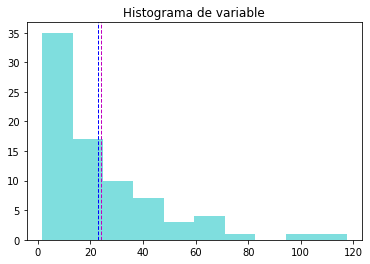

In [19]:
def graf_hist (dataframe_true, dataframe_sample, var, true_mean, sample_mean = False):
  df_sample = dataframe_sample[var]
  df_sample_dropna = dataframe_sample[var].dropna()
  df_true_mean = dataframe_true[var].dropna().mean()
  df_sample_mean = dataframe_sample[var].mean()
  if isinstance(df_sample, pd.Series) is True and df_sample.dtype != "object":
    plt.title("Histograma de variable")
    plt.hist(df_sample_dropna, color = "c", alpha = 0.5, density = False)
    if true_mean == True:
      plt.axvline(df_true_mean, color = "m", linestyle = "--", lw = 1)
      #plt.annotate("True mean", xy = (df_true_mean + 5, 0.06), color = "tomato", rotation = 60, ha = "center", size = 12)
    if sample_mean == True:
      plt.axvline(df_sample_mean, color = "b", linestyle = "--", lw = 1)
      #plt.annotate("Sample mean", xy = (df_sample_mean + 15, 0.06), color = "green", rotation = 60, ha = "center", size = 12)
  else:
    raise ValueError("Revisa la información proporcionada: selecciona una Serie del dataframe tipo float o integer.")

graf_hist(df, df_sample, "wef_imort", True, True)

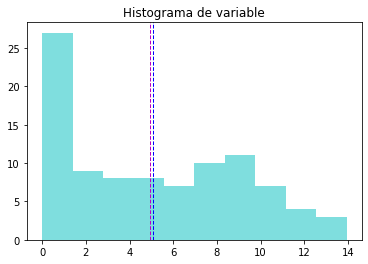

In [20]:
graf_hist(df, df_sample, "who_alc2000", True, True)

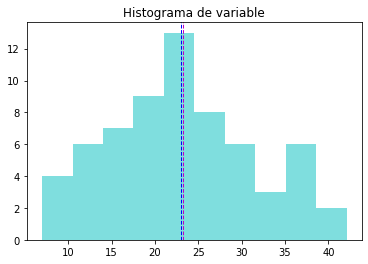

In [21]:
graf_hist(df, df_sample, "who_tobt", True, True)

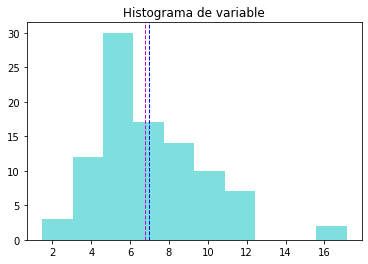

In [22]:
graf_hist(df, df_sample, "wdi_exph", True, True)

Respecto a las consultas del enunciado:

La media de la submuestra es mayor en el caso de la variable "wef_imort" solamente, en otros los otros casos el promedio es menor al de la muestra completa.

A pesar de lo anterior, se observa que las medias en todos los casos son muy similares.

##**Parte V**

Se deja como "dataframe_sample" la variable solicitada como "dataframe" para incorporar como variable el dataframe original del cual provienen los datos (variable llamada "dataframe_true").

En este caso se trabaja con las variables con menos registros nulos: "gle_cgdpc", "wdi_exph" y "who_alc200".

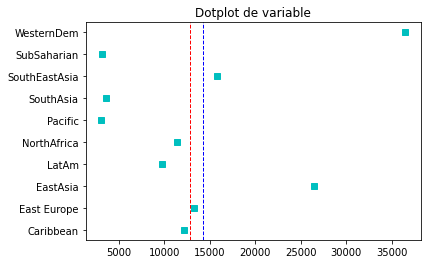

In [25]:
def graf_dotplot (dataframe_true, dataframe_sample, plot_var, plot_by, global_stat = False, statistic = "mean"):
  df_sample = dataframe_sample[plot_var]
  true_mean = dataframe_true[plot_var].dropna().mean()
  sample_mean = dataframe_sample[plot_var].dropna().mean()
  sample_median = dataframe_sample[plot_var].dropna().median()
  sample_mean_dotplot = round(dataframe_sample.groupby(plot_by)[plot_var].mean(), 2)

  if isinstance(df_sample, pd.Series) is True and df_sample.dtype != "object":
    plt.title("Dotplot de variable")
    plt.plot(sample_mean_dotplot.values, sample_mean_dotplot.index, "s", color = "c")
    if global_stat == True:
      plt.axvline(true_mean, color = "b", linestyle = "--", lw = 1)
    if statistic == "mean":
      plt.axvline(sample_mean, color = "r", linestyle = "--", lw = 1)
    elif statistic == "median":
      plt.axvline(sample_median, color = "r", linestyle = "--", lw = 1)
    
  else:
    raise ValueError("Revisa la información proporcionada: selecciona una Serie del dataframe tipo float o integer.")
  
graf_dotplot(df, df_sample, "gle_cgdpc", "region_name", True, "mean")

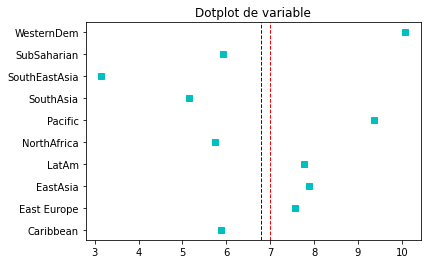

In [26]:
graf_dotplot(df, df_sample, "wdi_exph", "region_name", True, "mean")

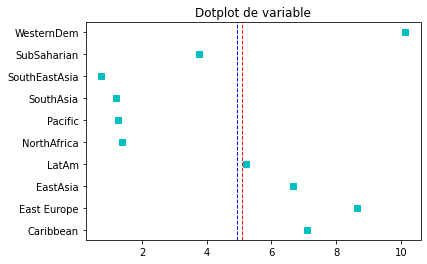

In [27]:
graf_dotplot(df, df_sample, "who_alc2000", "region_name", True, "mean")

#**Parte VI**

Se guarda submuestra en csv indicado.

In [28]:
df_sample.to_csv("subsample_FP_demo.csv")